In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import os 

In [4]:
data = pd.read_csv("../content/Wholesale customers data.csv")
data.shape

(440, 8)

In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
print('Descriptive Statastics of our Data:')
data.describe().T

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
print('Showing Meta Data :')
data.info()


Showing Meta Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
pd.isnull(data).sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [11]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [12]:
dataset = data.copy()
dataset['Channel'] = dataset['Channel'].map({1:'Horeca', 2:'Retail'})
dataset['Region'].replace([1,2,3],['Lisbon','Oporto','other'],inplace=True)
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844
3,Horeca,other,13265,1196,4221,6404,507,1788
4,Retail,other,22615,5410,7198,3915,1777,5185


In [0]:
def continous_data(i):
    if dataset[i].dtype!='object':
        print('--'*60)
        sns.boxplot(dataset[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))        
        dataset[i].plot.hist(bins = 20)
        plt.show()
        plt.clf()

------------------------------------------------------------------------------------------------------------------------


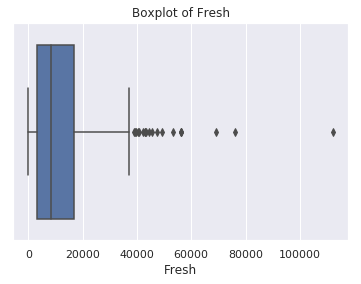

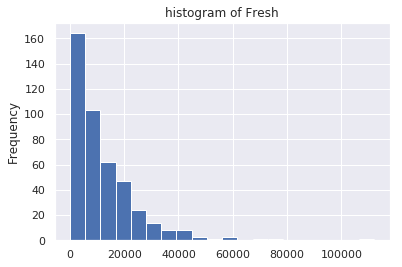

------------------------------------------------------------------------------------------------------------------------


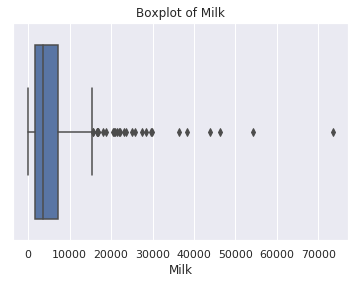

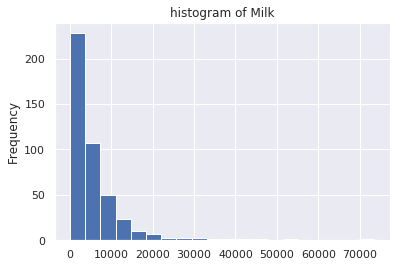

------------------------------------------------------------------------------------------------------------------------


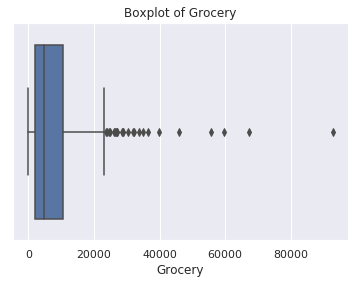

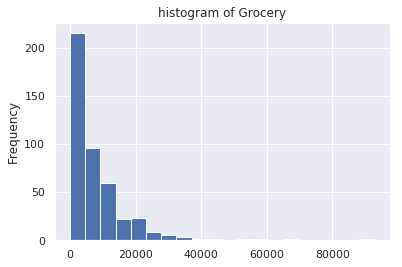

------------------------------------------------------------------------------------------------------------------------


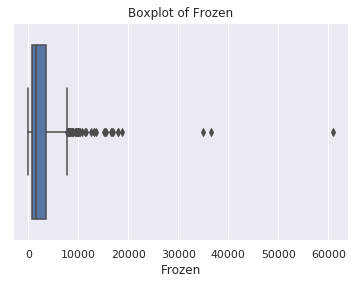

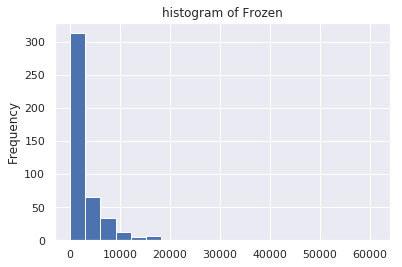

------------------------------------------------------------------------------------------------------------------------


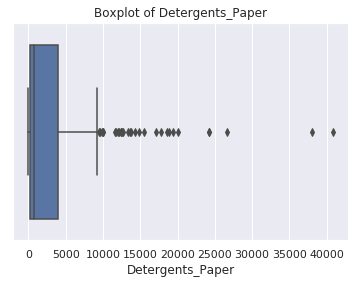

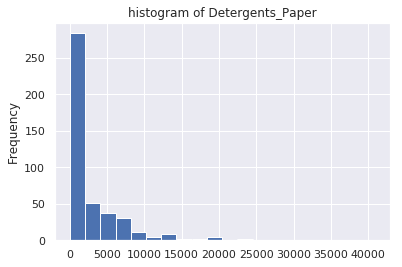

------------------------------------------------------------------------------------------------------------------------


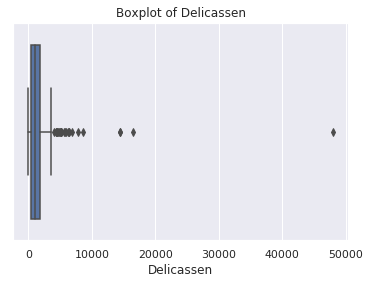

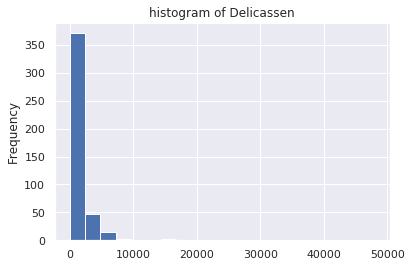

<Figure size 432x288 with 0 Axes>

In [14]:
sns.set() #Sets the default seaborn style
j=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for k in j:
    continous_data(i=k)

In [15]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844
3,Horeca,other,13265,1196,4221,6404,507,1788
4,Retail,other,22615,5410,7198,3915,1777,5185


In [0]:
# Scale the data using the natural logarithm
log_data = np.log(dataset[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].copy())

In [17]:
log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


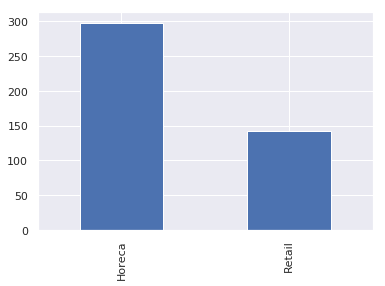

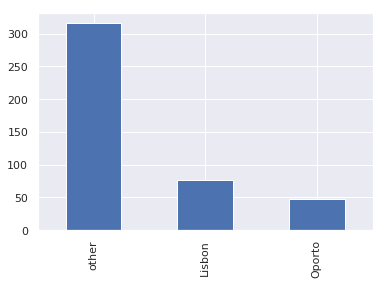

In [18]:
def categorical_data(i):
    dataset[i].value_counts().plot(kind='bar')

j_1 = ['Channel','Region']

for k in j_1:
    categorical_data(i=k)
    plt.show()

In [19]:
dataset.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Correlation Heat map of the data


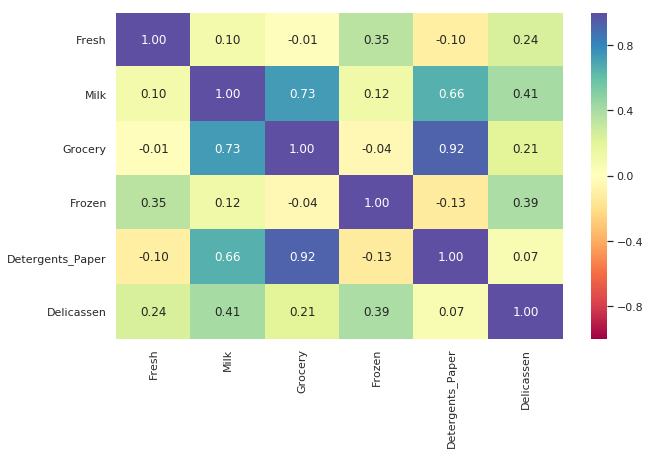

In [20]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()